## **Data Load**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Sheet_id='1zMdb9w1v8K7ore0pjzyKrmjOm99u5aUoQ5NIBbEb_lk'
data=pd.read_csv(f'https://docs.google.com/spreadsheets/d/{Sheet_id}/export?format=csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=data.copy(deep=True)

**The following features are present in the dataset:**

**stn_code :** Station code. A code is given to each station that recorded the data.





**sampling_date:** The date when the data was recorded.

**state:** It represents the states whose air quality data is measured.

**location:** It represents the city whose air quality data is measured.

**agency:** Name of the agency that measured the data.

**type:** The type of area where the measurement was made.

**so2:** The amount of Sulphur Dioxide measured.

**no2:** The amount of Nitrogen Dioxide measured

**rspm:** Respirable Suspended Particulate Matter measured.

**spm:** Suspended Particulate Matter measured.

**location_monitoring_station:** It indicates the location of the monitoring area.

**pm2_5:** It represents the value of particulate matter measured.

**date**: It represents the date of recording (It is a cleaner version of ‘sampling_date’ feature)

In [ ]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Exploration**

**Number of entries in each column**

**Type of entries in each column**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp



*   The figure above shows that our dataset contains 435742 entries.
*   We can also see that there are only two data types available: float and object.

*  There are only a few values for pm2 5.




**Number of null values in each column**

In [ ]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64







* There appear to be a lot of null values in some columns.
* we can see that pm2_5 has very few non-null values and may not be able to contribute much.
*  Let us pause for a moment to consider how useful the features are.
  * Agency's name is not necessary because name has nothing to do with how polluted the state is. Likewise, stn code is unnecessary.
  * It is stated in the data description that date is a more accurate representation of the sampling date attribute, so we will use it.
  * The location monitoring station attribute is also unnecessary because it contains the location of the monitoring station, which is irrelevant to the analysis.


**To summarise we removed from our dataset: agency, stn_code, sampling_date, and location_monitoring_station.**

In [ ]:
df.drop(['stn_code','sampling_date','location_monitoring_station'],axis=1)

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990
...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,NaN,12/24/2015
435738,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,NaN,12/29/2015
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

* It represents the type of area where the data was recorded like industrial, residential, etc.
* It seems that we have redundant types.
* It can be classified into three classes or types: industrial, residential, other.

In [ ]:
df['type'] = df['type'].map(lambda x: x if type(x)==float else 'Residential' if x[0]=='R' else 'Industrial' if x[0]=='I' else 'Other')

**type attribute after changing the categories**

In [ ]:
df['type']

0         Residential
1          Industrial
2         Residential
3         Residential
4          Industrial
             ...     
435737    Residential
435738    Residential
435739            NaN
435740            NaN
435741            NaN
Name: type, Length: 435742, dtype: object

In [ ]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

Now let us consider the null values.

We have few null values in type, location, and so2 and so we removed the rows which have null values in each of the three attributes.

In [ ]:
# deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
# deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

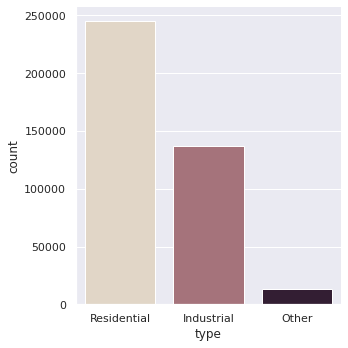

In [ ]:
import seaborn as sns
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

## **Data Visualization**

**Concentration of so2 in different states, using bar plots, in descending order.**

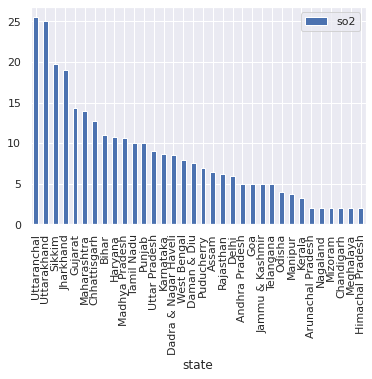

In [ ]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

* so2 level is highest in Uttarakhand and lowest in Himachal Pradesh.
* In Uttarakhand, Sikkim, Jharkhand, Gujarat, Maharashtra, Chattisgarh government should take action against the growing so2 concentration in these state

**Plotting the location of the so2 concentration (city) wise**

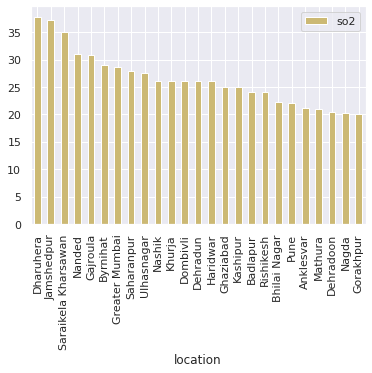

In [ ]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(25).plot.bar(color = 'y')

* Plot shows 25 locations with the highest so2 levels in descending order.
* Dharudhera and Jamshedpur has the highest so2 concentration.
* Nagda and Gorakhpur have the least concentrations of so2 among the top 25 locations.

plotting the 25 locations with least so2 concentrations



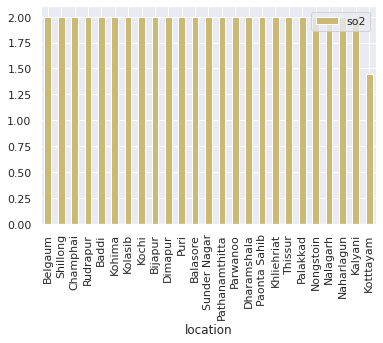

In [ ]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(25).plot.bar(color = 'y')

* so2 level is least in Kottayam(kerala)
* locations Belgaum, Shillong,Champhai,Nalagarh, Naharlagun,Kalyani etc have almost the same so2 concentrations.

**Concentration of no2 in different states, using bar plots, in descending order.**

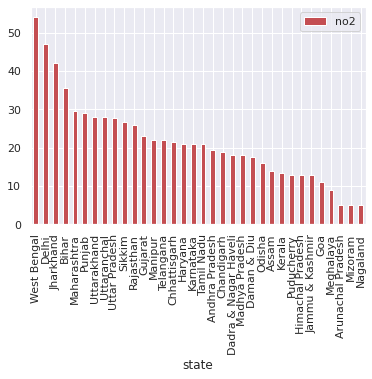

In [ ]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

* West Bengal has the maximum level of no2 and Mizoram has the least.
* Delhi is at second and followed by jharkhand.


**Plotting the location of the no2 concentration (city) wise**

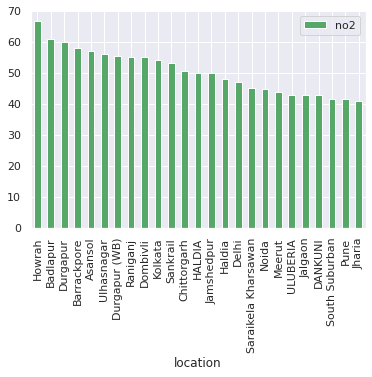

In [ ]:
# bar plot of no2 vs location - desc order - first 25
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(25).plot.bar(color = 'g')


* Plot shows 25 locations with the highest no2 level.
* Howrah has the highest no2 concentration, followed by Badlapur and Durgapur.
* It is clear that the most polluted city(Howrah) belongs to the most polluted state(West Bengal), in terms of no2.


Plotting the 25 locations with least so2 concentrations

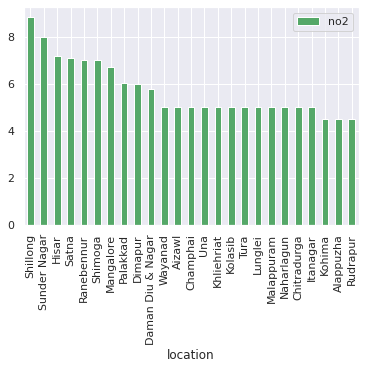

In [ ]:
# bar plot of no2 vs location - desc order - last 25
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(25).plot.bar(color = 'g')

* Rudrapur is the least polluted city in terms of no2, followed by Alappuzha and Kohima.

**rspm in different states using bar plots in descending order.**

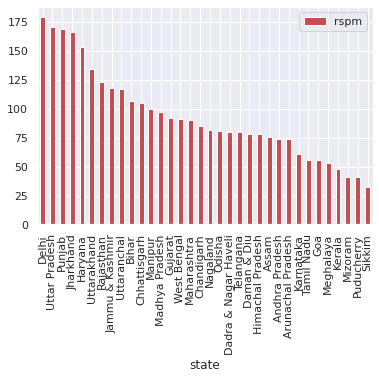

In [ ]:
# rspm
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

* Delhi has the highest concentration of rspm
* Delhi has made people suffer a lot and has been responsible for the deaths of thousands

**Plotting the location of the rspm (city) wise**

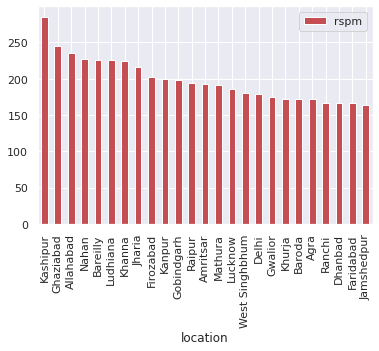

In [ ]:
# rspm-location wise - first 25
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(25).plot.bar(color = 'r')



* Highest amount of rspm is found in Kashipur, Uttarakhand, followed by Ghaziabad, Uttar Pradesh, and Allahabad..
* UP is the second most polluted state in terms of rspm because the majority of the top areas are located there.

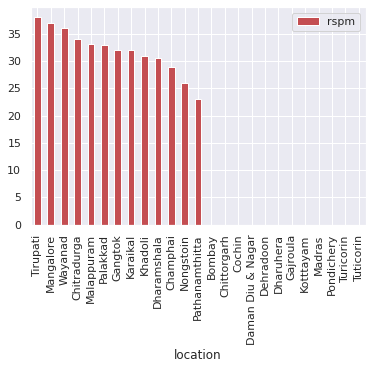

In [ ]:
# rspm-location wise - last 25
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(25).plot.bar(color = 'r')

* Plot reveals that Pathanamthitta, Nongstoin, and Champhai have the lowest levels of rspm (Mizoram). 
* On the barplot of rspm vs states, the states to which these places belong are on the lower side.

**spm in different states using bar plots in descending order.**

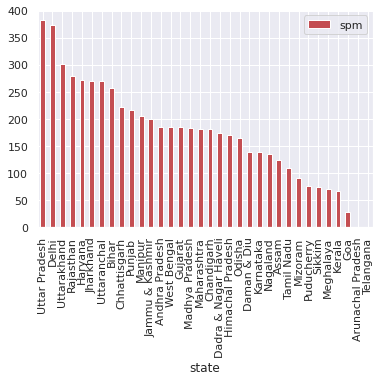

In [ ]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

**Plotting the location of the spm (city) wise**

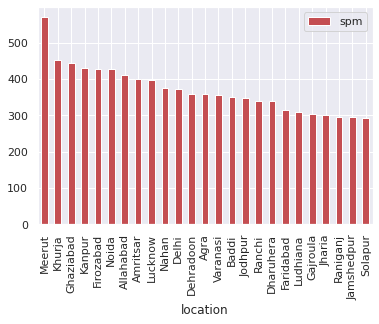

In [ ]:
# spm-location wise - first 25
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(25).plot.bar(color = 'r')

* According to the above barplot, Ghaziabad, Khurja, and Meerut are the three most polluted cities in terms of spm (UP).
* Meerut, Khurja, Ghaziabad, Kanpur, Firozabad, Noida, and Allahabad are the top 7 cities in India. 
* worrying issue because the most populous state in the nation has the highest levels of spm or rspm pollution.

**plotting of pm2_5:particulate matter w.r.t state**

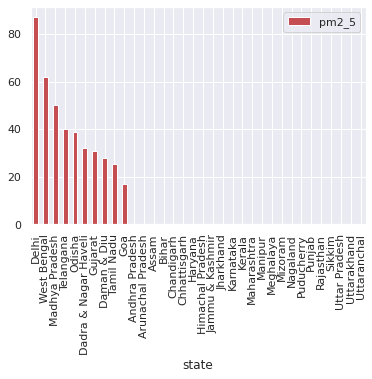

In [ ]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

* pm2 5 had the highest percentage of null values therefore it is clear that we have null values for the majority of the states.
* Madhya Pradesh and West Bengal are at the top of the list, followed by Delhi once more.
With so many null values in pm2_5

**plotting of pm2_5:particulate matter w.r.t location**

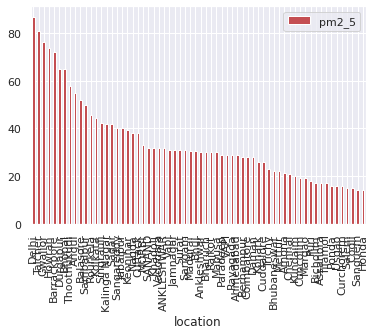

In [ ]:
# pm2_5 vs location
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

* top spot is still held by Delhi which is followed by Talcher and Gwalior.

## **Statistical Analysis**


<Figure size 720x504 with 0 Axes>

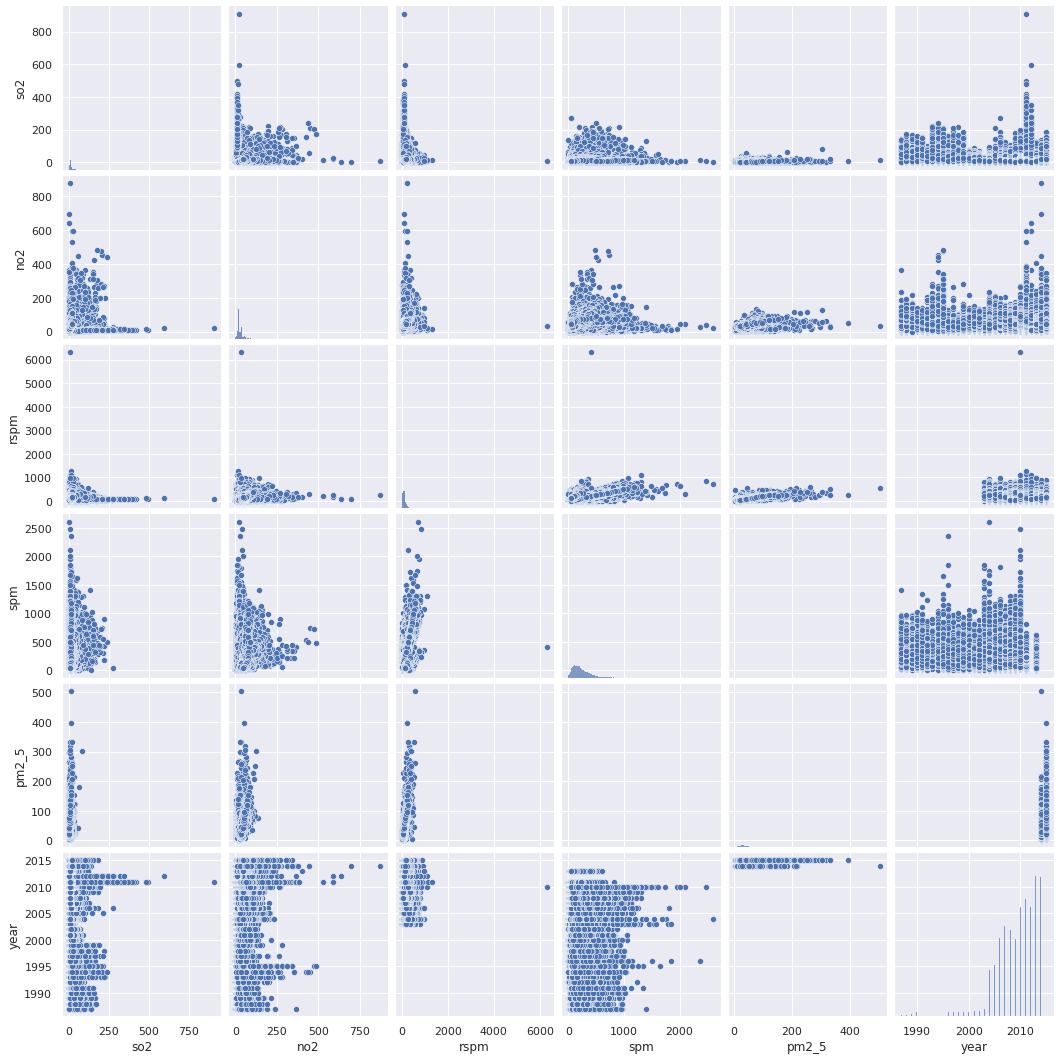

In [ ]:
plt.figure(figsize=(10,7))
#Scatter plots of all columns
# sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df)
plt.show()


## **Date Feature**

In [ ]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Residential,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Residential,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Residential,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990


**so2 analysis using the heatmap**

row: state attribute

column: year attribute

value: so2 attribute

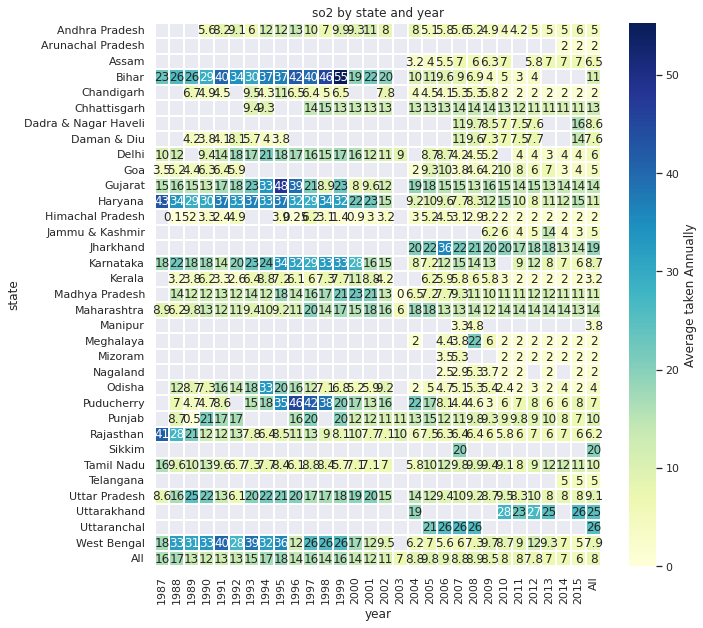

In [ ]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

* Increase of so2 concentration in Bihar from 1987 to 1999.
* High concentration of so2 in Gujarat around 1995. 
* Harayana also so2 level has been high around 1987 and till 2003.
* In Karnataka also there is increase in so2 concentration from 1987 to 2000.

**no2 analysis using the heatmap**

row: state attribute

column: year attribute

value: no2 attribute

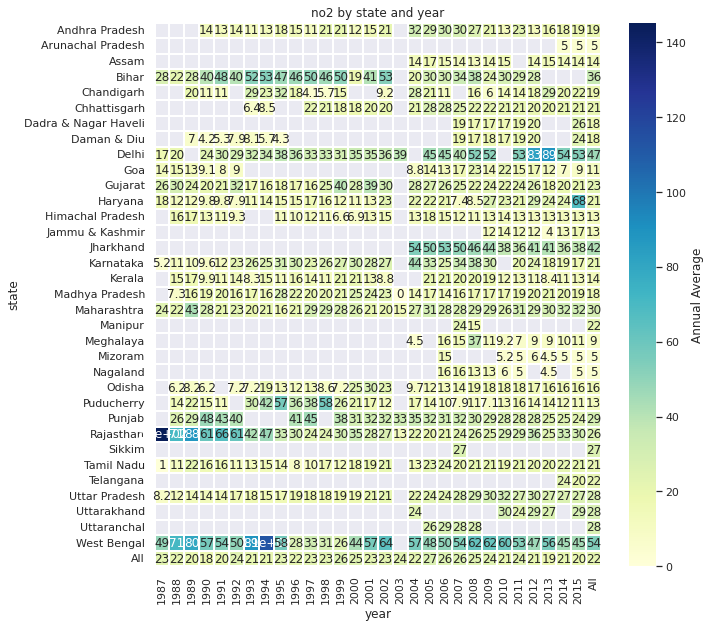

In [ ]:
# Heatmap Pivot with State as Row, Year as Col, no2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

* In earlier high no2 concentration in Rajasthan, Bihar, Delhi, Haryana, Jharkhand, Puducherry, and West Bengal.
* Some states, like Rajasthan, have had a yearly decline in the no2 concentration, but other states, like Bihar, Delhi, etc., have seen a growth.
* Other states with persistently high no2 concentrations include West Bengal and Jharkhand.

## **Conclusions**

* Conclusions that the northern area of India has the most air pollution affected states.
* States with high levels of pollution, such as Delhi, Punjab, Uttar Pradesh, and Haryana, call for rapid action.
* Additionally, we observed that even in states with high pollution levels, some areas remained unpolluted.

* The states with high rspm concentrations also have high spm concentrations, as shown by statistical analysis and scatter plots.

* From the heatmap that some states were very polluted in the beginning (1980 to 2000), but were later cleaned up.


In [5]:
!jupyter nbconvert --to pdf DAV_project.ipynb

[NbConvertApp] Converting notebook DAV_project.ipynb to pdf
[NbConvertApp] Support files will be in DAV_project_files/
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_files
[NbConvertApp] Making directory ./DAV_project_fil